In [1]:
import pandas as pd
import numpy as np

# Import CSV file
path = r"C:\Users\Administrator\Desktop\Automobile-Data-Set\After_Data_Wrangling.csv"

df = pd.read_csv(path)
df.head(4)

,index,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495,11.190476,8.703704,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500,11.190476,8.703704,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950,9.791667,7.833333,Medium,0,1,1,0


In [2]:
# only use numeric data:
df = df._get_numeric_data()

In [3]:
#Libraries for plotting:
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
#Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    # Assingn fig. with parameters above
    plt.figure(figsize = (width, height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color = "r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")
    
    plt.show()
    plt.close()

In [5]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,"ro",label="Training Data")
    plt.plot(xtest,y_test,"go",label="Test Data")
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label="Predicted Function")
    plt.ylim([-10000,60000])
    plt.ylabel("Price")
    plt.legend()

    

### Training and Testing

In [6]:
# the target data price in a separate dataframe y:
y_data = df["price"]

#Drop price data in x data:
x_data = df.drop("price", axis = 1)


In [7]:
# randomly split  data into training and testing data using the function train_test_split:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print("number of test samples: ",x_test.shape[0])
print("number of training samples: ", x_train.shape[0])


number of test samples:  31
number of training samples:  170


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 15% of the total dataset

In [8]:
# import LinearRegression from the module linear_model:
from sklearn.linear_model import LinearRegression

# create a Linear Regression object:
lre = LinearRegression()

#fit the model using the feature 'horsepower':

lre.fit(x_train[["horsepower"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#Calculate the R^2 on the test data:
lre.score(x_test[["horsepower"]], y_test)

0.7076883741478763

In [10]:
lre.score(x_train[["horsepower"]], y_train)

0.6449517437742229

Move to **Cross-validation Score¶**
 
     import model_selection from the module cross_val_scor:

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
# Input the object, the feature in this case ' horsepower', the target data (y_data).
# The parameter 'cv' determines the number of folds; in this case 4:
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=4)

In [13]:
# default scoring is R^2; each element in the array has the average R^2 value in the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [14]:
# Calculate the average and standard deviation of estimate:
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

The mean of the folds are 0.5220099150489845 and the standard deviation is 0.291183944492441


In [15]:
# use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error':
-1 * cross_val_score(lre, x_data[["horsepower"]], y_data, cv = 4, scoring = "neg_mean_squared_error")

array([20254142.83987867, 43745493.26483265, 12539630.33813385,
       17561927.72284139])

In [16]:
#use the function 'cross_val_predict' to predict the output
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807517, 14141.63807517, 20814.29423487, 12745.03562313,
       14762.35027607])

In [17]:
# Let's create Multiple linear regression objects and train the model using 'horsepower',
# 'curb-weight', 'engine-size' and 'highway-mpg' as features:
lr = LinearRegression()
lr.fit(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Prediction using training data:
yhat_train = lr.predict(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_train[0:5]

array([11927.70699811, 11236.71672034,  6436.91775513, 21890.22064995,
       16667.18254858])

In [19]:
# Prediction using test data:
yhat_test = lr.predict(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_test[0:5]

array([11349.16502423,  5914.48335386, 11243.76325981,  6662.03197042,
       15555.76936278])

In [20]:
#Perform model evaluation using training and testing data separately. 
#import the seaborn and matplotlibb library for plotting:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


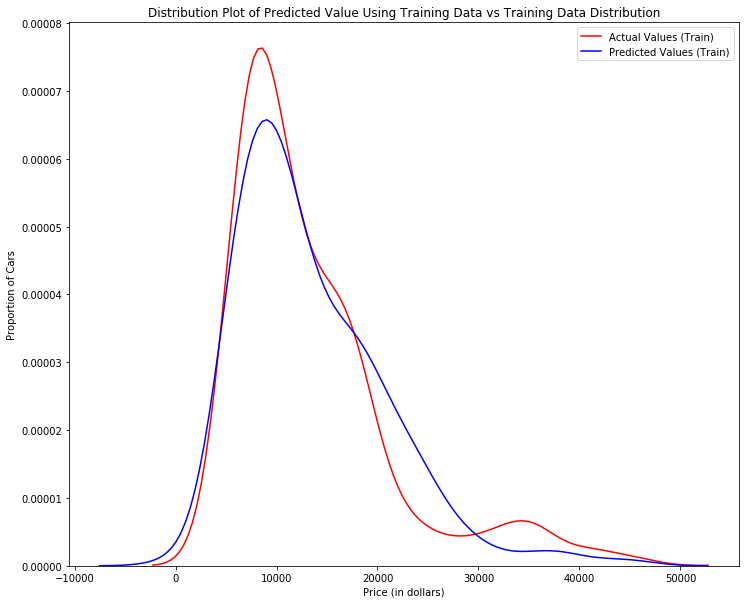

In [21]:
#examine the distribution of the predicted values of the training data:
Title = "Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


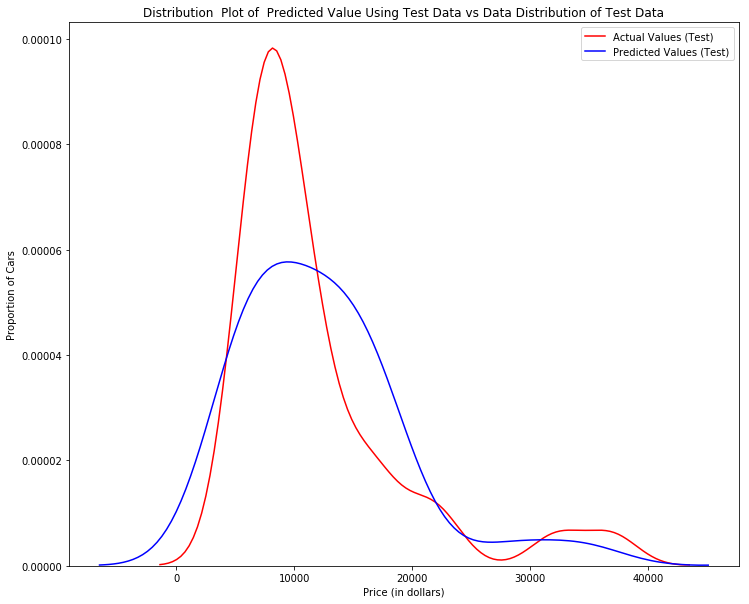

In [22]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different.

In [23]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# use 45 percent of the data for testing and the rest for training:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [25]:
# perform a degree 5 polynomial transformation on the feature 'horse power':
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [26]:
# Create a linear regression model "poly" and train it:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
yhat = poly.predict(x_test_pr) 
yhat[0:5]

array([ 6728.76157846,  7308.08561199, 12213.82604989, 18893.08677737,
       19995.76902204])

In [28]:
# the first five predicted values and compare it to the actual targets:
print("Predicted values:", yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [ 6728.76157846  7308.08561199 12213.82604989 18893.08677737]
True values: [ 6295 10698 13860 13499]


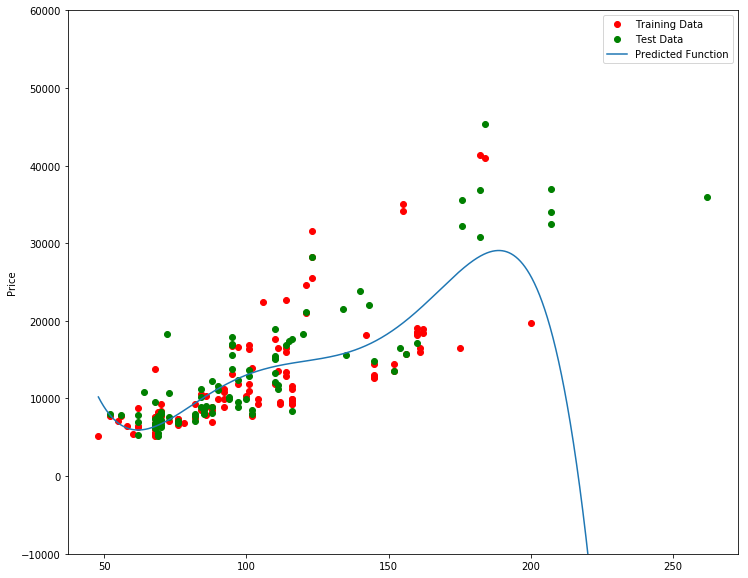

In [29]:
# function "PollyPlot" that we defined at the beginning of the 
# lab to display the training data, testing data, and the predicted function:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

In [30]:
#R^2 of the training data:
poly.score(x_train_pr, y_train)

0.556771690158152

In [31]:
#R^2 of the test data: 
poly.score(x_test_pr, y_test)

-29.871572806662673

Text(3,0.75,'Maximum R^2')

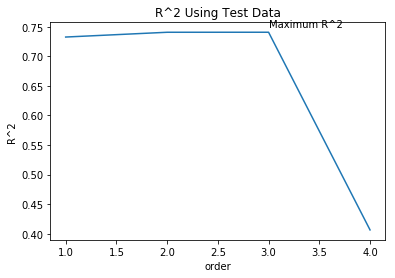

In [32]:
# R^2 changes on the test data for different order polynomials and plot the results:
Rsqu_test = []

order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree = n)
    
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 Using Test Data")
plt.text(3, 0.75, "Maximum R^2")    

The R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

In [33]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =test_data, random_state = 0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)

In [34]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data.
interact(f, order = (0,6,1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Moving to **Ridge Regression** perform a degree two polynomial transformation on data:

In [35]:
pr = PolynomialFeatures(degree = 2)
x_train_pr=pr.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg","normalized-losses","symboling"]])
x_test_pr=pr.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg","normalized-losses","symboling"]])

In [36]:
# import Ridge from the module linear models:
from sklearn.linear_model import Ridge

In [38]:
#Ridge regression object, setting the regularization parameter to 0.1:
RigeModel = Ridge(alpha=0.1)

In [39]:
# fit the model using the method fit:
RigeModel.fit(x_train_pr, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.029716e-16
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
# Obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

In [41]:
# Compare the first five predicted samples to test set:
print("predicted:", yhat[0:4])
print("test set:", y_test[0:4].values)

predicted: [ 6567.83081951  9597.97151372 20836.22326817 19347.6954346 ]
test set: [ 6295 10698 13860 13499]


In [43]:
# Select the value of Alfa that minimizes the test error. Use a for loop:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 5000 * np.array(range(0,10000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

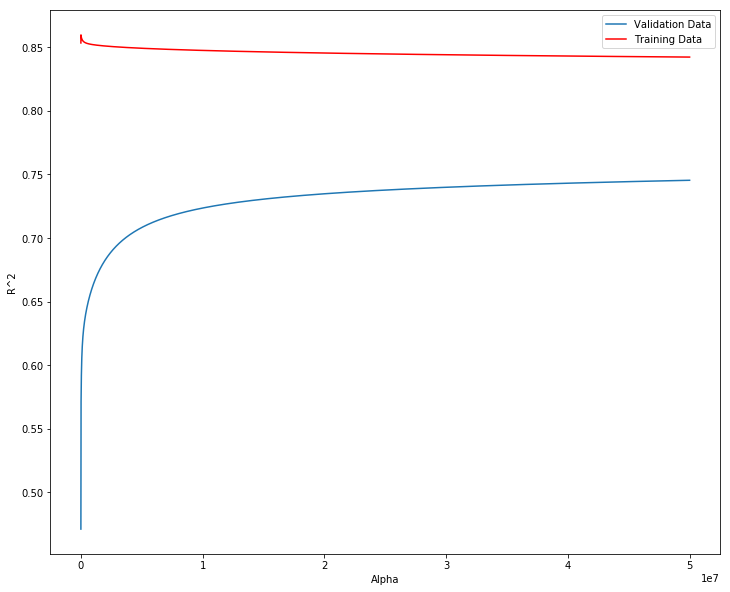

In [44]:
#  Plot out the value of R^2 for different Alphas:
width = 12
height = 10
plt.figure(figsize=(width,height))

plt.plot(ALFA,Rsqu_test, label = "Validation Data")
plt.plot(ALFA, Rsqu_train, "r", label = "Training Data")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend()

Blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa.

Move to **Grid Search**

In [45]:
# Import GridSearchCV from the module model_selection:
from sklearn.model_selection import GridSearchCV

In [46]:
#Create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [47]:
#Create a ridge regions object:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
# Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [49]:
#Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
# Obtain the estimator with the best parameters and assign it to the variable BestRR as follows:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
# Test model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)

0.8411649831054419